## Keras_fashion_minst辨識

In [1]:
import numpy as np  
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os

In [2]:
(X_trains, y_trains), (X_tests, y_tests)= tf.keras.datasets.fashion_mnist.load_data()
print ("X_trains.shape:",X_trains.shape,"y_trains.shape:", y_trains.shape)

X_trains.shape: (60000, 28, 28) y_trains.shape: (60000,)


y = 0 T-shirt/top


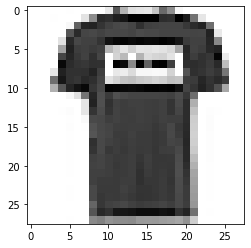

In [3]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
img = 1
#img = X_trains[4].reshape(28, 28)
label_index = y_trains[img]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(X_trains[img], cmap='Greys')

In [4]:
data = X_trains[1].copy()
data[data>0]=1
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image


['[0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_trains) 
y_TestOneHot = np_utils.to_categorical(y_tests) 
y_TestOneHot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [6]:
X_train_2D = X_trains.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_tests.reshape(10000, 28*28).astype('float32')  
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

In [7]:
# 建立簡單的線性執行的模型
model= keras.models.Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer="normal", activation='relu'))
model.add(Dense(units=10, kernel_initializer="normal", activation="softmax"))
#編譯損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#進行訓練
train_history=model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=25, batch_size=800, verbose=2)

Epoch 1/25


60/60 - 1s - loss: 0.8168 - accuracy: 0.7344 - val_loss: 0.5414 - val_accuracy: 0.8173


Epoch 2/25


60/60 - 1s - loss: 0.4942 - accuracy: 0.8318 - val_loss: 0.4711 - val_accuracy: 0.8341


Epoch 3/25


60/60 - 1s - loss: 0.4372 - accuracy: 0.8506 - val_loss: 0.4287 - val_accuracy: 0.8495


Epoch 4/25


60/60 - 1s - loss: 0.4059 - accuracy: 0.8610 - val_loss: 0.4086 - val_accuracy: 0.8575


Epoch 5/25


60/60 - 1s - loss: 0.3839 - accuracy: 0.8673 - val_loss: 0.3988 - val_accuracy: 0.8622


Epoch 6/25


60/60 - 1s - loss: 0.3667 - accuracy: 0.8708 - val_loss: 0.3967 - val_accuracy: 0.8631


Epoch 7/25


60/60 - 1s - loss: 0.3543 - accuracy: 0.8752 - val_loss: 0.3699 - val_accuracy: 0.8698


Epoch 8/25


60/60 - 1s - loss: 0.3363 - accuracy: 0.8807 - val_loss: 0.3614 - val_accuracy: 0.8756


Epoch 9/25


60/60 - 1s - loss: 0.3270 - accuracy: 0.8842 - val_loss: 0.3824 - val_accuracy: 0.8649


Epoch 10/25


60/60 - 1s - loss: 0.3184 - accuracy: 0.8859 - val_loss: 0.3423 - val_accuracy: 0.8791


Epoch 11/25


60/60 - 1s - loss: 0.3046 - accuracy: 0.8918 - val_loss: 0.3392 - val_accuracy: 0.8803


Epoch 12/25


60/60 - 1s - loss: 0.2995 - accuracy: 0.8931 - val_loss: 0.3431 - val_accuracy: 0.8798


Epoch 13/25


60/60 - 1s - loss: 0.2936 - accuracy: 0.8953 - val_loss: 0.3338 - val_accuracy: 0.8812


Epoch 14/25


60/60 - 1s - loss: 0.2828 - accuracy: 0.8990 - val_loss: 0.3337 - val_accuracy: 0.8817


Epoch 15/25


60/60 - 1s - loss: 0.2762 - accuracy: 0.9014 - val_loss: 0.3356 - val_accuracy: 0.8799


Epoch 16/25


60/60 - 1s - loss: 0.2713 - accuracy: 0.9027 - val_loss: 0.3225 - val_accuracy: 0.8862


Epoch 17/25


60/60 - 1s - loss: 0.2636 - accuracy: 0.9060 - val_loss: 0.3216 - val_accuracy: 0.8842


Epoch 18/25


60/60 - 1s - loss: 0.2601 - accuracy: 0.9070 - val_loss: 0.3244 - val_accuracy: 0.8851


Epoch 19/25


60/60 - 1s - loss: 0.2543 - accuracy: 0.9087 - val_loss: 0.3218 - val_accuracy: 0.8846


Epoch 20/25


60/60 - 1s - loss: 0.2490 - accuracy: 0.9109 - val_loss: 0.3255 - val_accuracy: 0.8845


Epoch 21/25


60/60 - 1s - loss: 0.2514 - accuracy: 0.9093 - val_loss: 0.3294 - val_accuracy: 0.8831


Epoch 22/25


60/60 - 1s - loss: 0.2420 - accuracy: 0.9132 - val_loss: 0.3176 - val_accuracy: 0.8872


Epoch 23/25


60/60 - 1s - loss: 0.2355 - accuracy: 0.9152 - val_loss: 0.3216 - val_accuracy: 0.8863


Epoch 24/25


60/60 - 1s - loss: 0.2321 - accuracy: 0.9170 - val_loss: 0.3131 - val_accuracy: 0.8892


Epoch 25/25


60/60 - 1s - loss: 0.2295 - accuracy: 0.9178 - val_loss: 0.3106 - val_accuracy: 0.8888


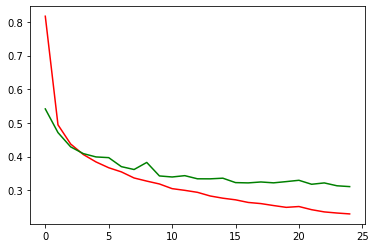

In [8]:
plt.plot(train_history.history["loss"], "r")
plt.plot(train_history.history["val_loss"], "g")

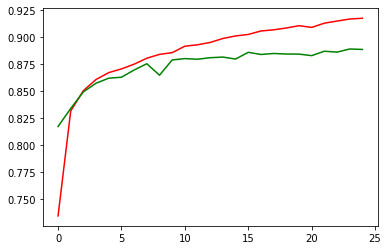

In [9]:
plt.plot(train_history.history["accuracy"], "r")
plt.plot(train_history.history["val_accuracy"], "g")

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)   
print(f"準確度 = {scores[1]*100.0:2.1f}")

  1/313 [..............................] - ETA: 0s - loss: 0.2448 - accuracy: 0.9062

 17/313 [>.............................] - ETA: 0s - loss: 0.3229 - accuracy: 0.8842

 33/313 [==>...........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.8864

 49/313 [===>..........................] - ETA: 0s - loss: 0.3252 - accuracy: 0.8852

 66/313 [=====>........................] - ETA: 0s - loss: 0.3174 - accuracy: 0.8873

 83/313 [======>.......................] - ETA: 0s - loss: 0.3181 - accuracy: 0.8855

 99/313 [========>.....................] - ETA: 0s - loss: 0.3261 - accuracy: 0.8842

116/313 [==========>...................] - ETA: 0s - loss: 0.3370 - accuracy: 0.8804

132/313 [===========>..................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8778

148/313 [=============>................] - ETA: 0s - loss: 0.3401 - accuracy: 0.8792

165/313 [==============>...............] - ETA: 0s - loss: 0.3468 - accuracy: 0.8780

181/313 [================>.............] - ETA: 0s - loss: 0.3515 - accuracy: 0.8774

197/313 [=================>............] - ETA: 0s - loss: 0.3471 - accuracy: 0.8775

213/313 [===================>..........] - ETA: 0s - loss: 0.3459 - accuracy: 0.8785

228/313 [====================>.........] - ETA: 0s - loss: 0.3449 - accuracy: 0.8782

244/313 [======================>.......] - ETA: 0s - loss: 0.3365 - accuracy: 0.8806

260/313 [=======================>......] - ETA: 0s - loss: 0.3352 - accuracy: 0.8815

276/313 [=========================>....] - ETA: 0s - loss: 0.3367 - accuracy: 0.8819

293/313 [===========================>..] - ETA: 0s - loss: 0.3371 - accuracy: 0.8820

309/313 [============================>.] - ETA: 0s - loss: 0.3340 - accuracy: 0.8828

313/313 [==============================] - 1s 3ms/step - loss: 0.3338 - accuracy: 0.8827


準確度 = 88.3
